1. EDA датасета — отрисовка графиков, методы описательной статистики, проверка гипотез
В первой части вам необходимо взять один из двух предложенных даатестов и провести для него EDA. В ходе анализа вам необходимо визуализировать данные, посмотреть на визуальные зависимости и сделать не менее пяти гипотез.
После этого гипотезы необходимо проверить при помощи статистических тестов с обязательной аргементацией выбора тестов.
Ваше решение должно включать параметрические и непараметрические тесты, проверку корреляций, проверку равенства средних (медиан), а также проверку независимости переменных.
Датасеты на выбор:
Heart diseases: https://archive.ics.uci.edu/dataset/45/heart+disease
Титаник: https://www.kaggle.com/datasets/yasserh/titanic-dataset


# Загрузка и первичный анализ данных

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import chi2_contingency, ttest_ind, mannwhitneyu, f_oneway, kruskal


In [ ]:
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv('/content/Titanic-Dataset.csv')

In [ ]:
df.info()
df.describe()
df_null = df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Гистограмма распределения возраста

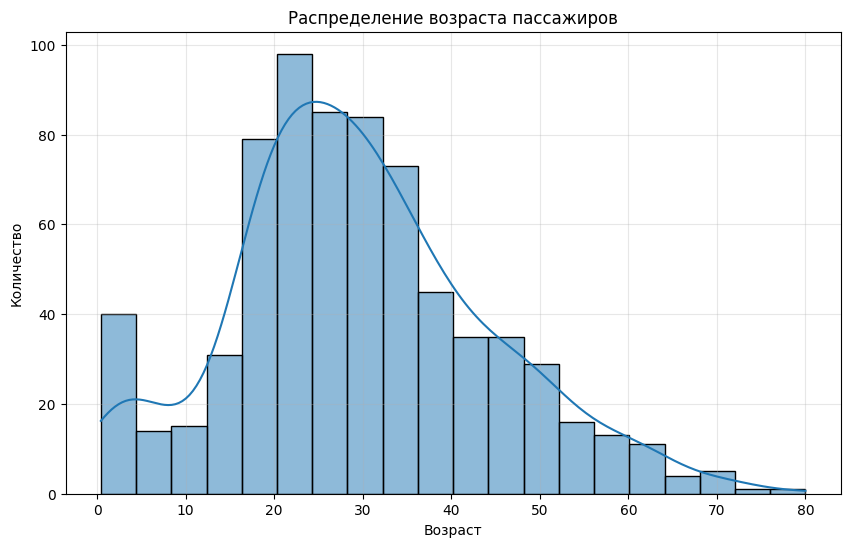

In [ ]:

plt.figure(figsize=(10, 6))
sns.histplot(df['Age'].dropna(), kde=True)
plt.title('Распределение возраста пассажиров')
plt.xlabel('Возраст')
plt.ylabel('Количество')
plt.grid(True, alpha=0.3)
plt.show()

# Гистограмма распределения стоимости билета

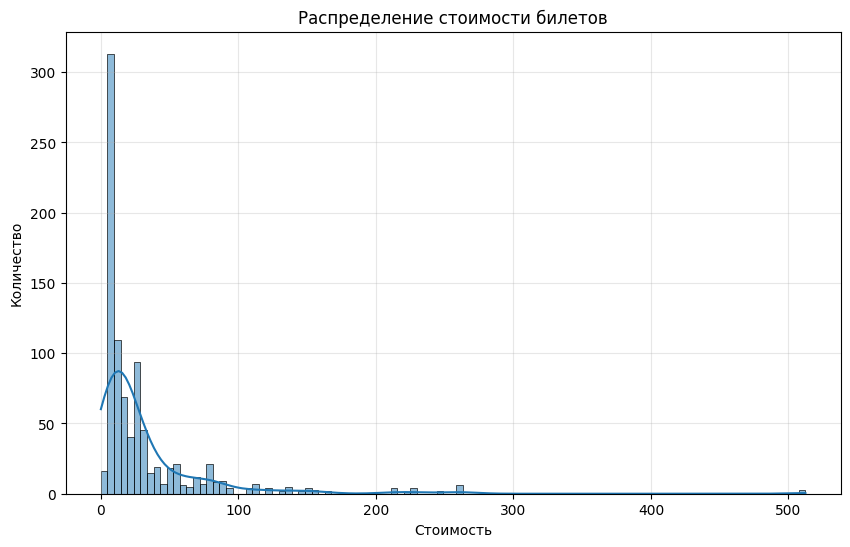

In [ ]:

plt.figure(figsize=(10, 6))
sns.histplot(df['Fare'].dropna(), kde=True)
plt.title('Распределение стоимости билетов')
plt.xlabel('Стоимость')
plt.ylabel('Количество')
plt.grid(True, alpha=0.3)
plt.savefig('fare_distribution.png')
plt.show()

# 2. Визуализация данных


# Визуализация выживаемости в зависимости от пола


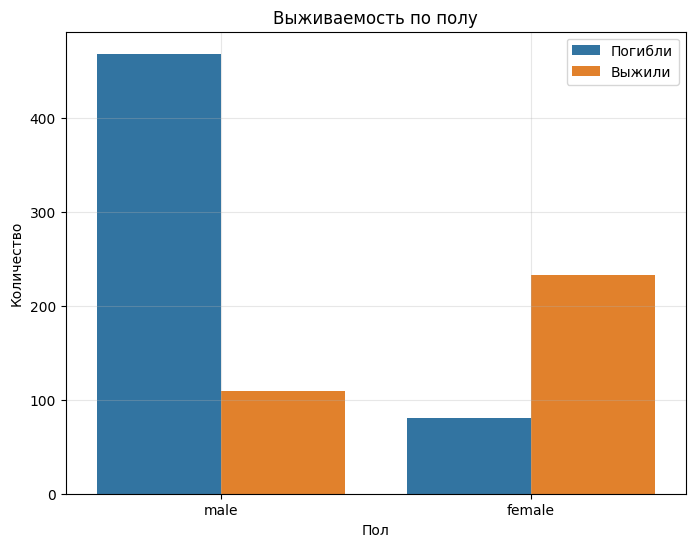

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title('Выживаемость по полу')
plt.xlabel('Пол')
plt.ylabel('Количество')
plt.legend(['Погибли', 'Выжили'])
plt.grid(True, alpha=0.3)
plt.show()


# Визуализация выживаемости в зависимости от класса


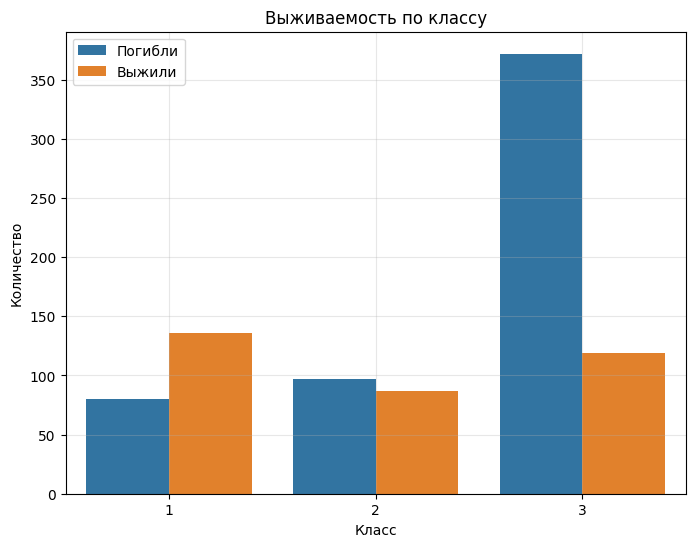

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title('Выживаемость по классу')
plt.xlabel('Класс')
plt.ylabel('Количество')
plt.legend(['Погибли', 'Выжили'])
plt.grid(True, alpha=0.3)
plt.show()

# Визуализация выживаемости в зависимости от возраста


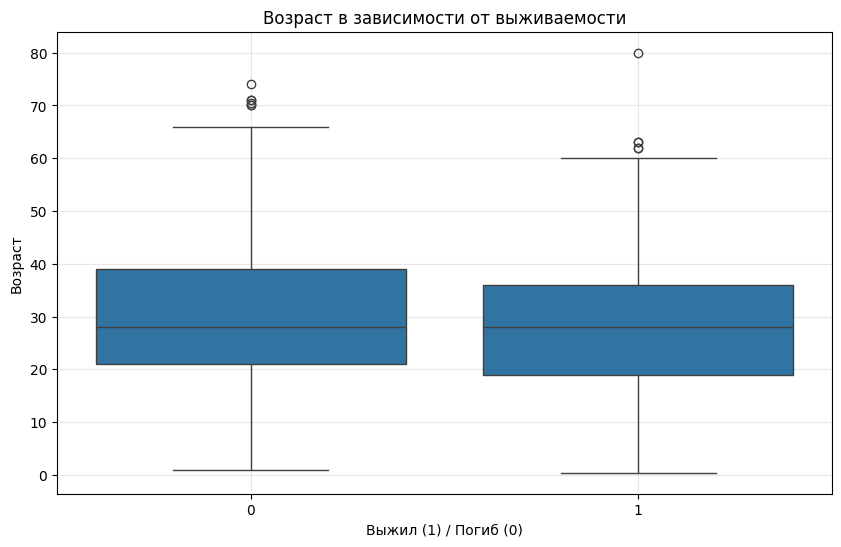

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Survived', y='Age', data=df)
plt.title('Возраст в зависимости от выживаемости')
plt.xlabel('Выжил (1) / Погиб (0)')
plt.ylabel('Возраст')
plt.grid(True, alpha=0.3)
plt.show()

# Корреляционная матрица числовых признаков


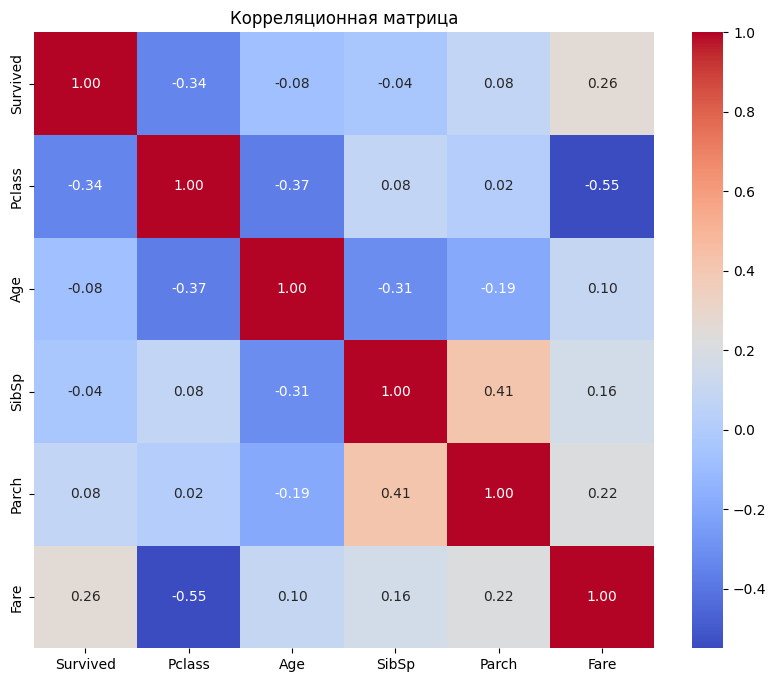

In [ ]:
numeric_cols = ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
corr_matrix = df[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Корреляционная матрица')
plt.show()


# Распределение возраста по классам


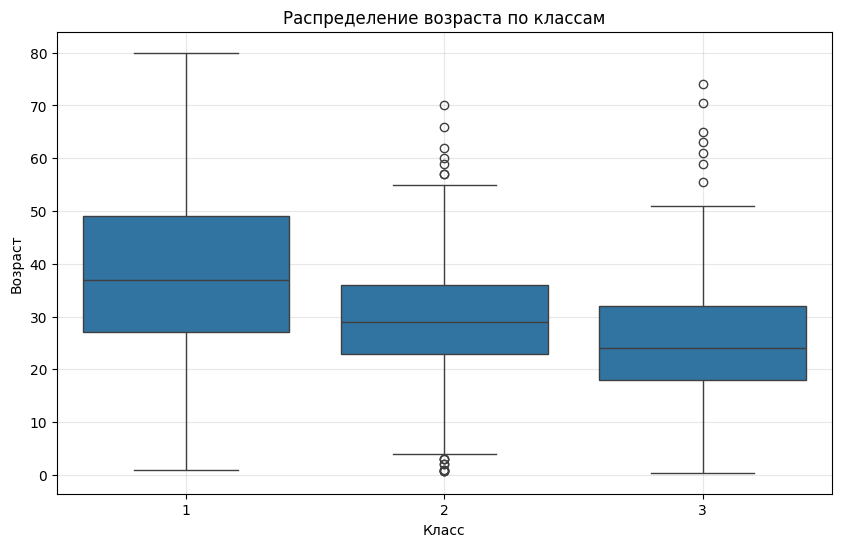

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Pclass', y='Age', data=df)
plt.title('Распределение возраста по классам')
plt.xlabel('Класс')
plt.ylabel('Возраст')
plt.grid(True, alpha=0.3)
plt.show()


# Распределение стоимости билета по классам


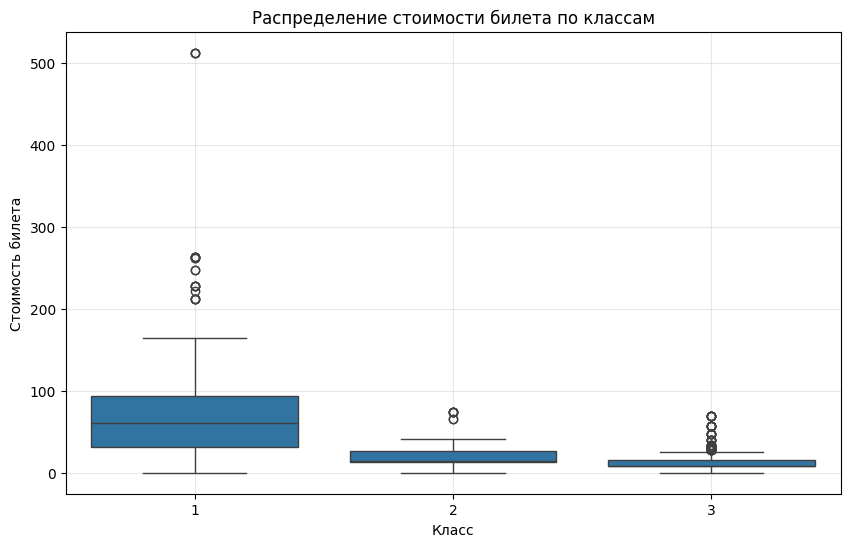

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Pclass', y='Fare', data=df)
plt.title('Распределение стоимости билета по классам')
plt.xlabel('Класс')
plt.ylabel('Стоимость билета')
plt.grid(True, alpha=0.3)
plt.show()

# 3. Подготовка данных для статистического анализа


In [ ]:
# Заполнение пропущенных значений возраста медианой
df['Age_filled'] = df['Age'].fillna(df['Age'].median())

# Заполнение пропущенных значений поля Embarked наиболее частым значением
df['Embarked_filled'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Кодирование категориальных переменных
df['Sex_code'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked_code'] = df['Embarked_filled'].map({'C': 0, 'Q': 1, 'S': 2})

# Создание групп по возрасту
def age_group(age):
    if age < 18:
        return 'Ребенок'
    elif age < 35:
        return 'Молодой'
    elif age < 60:
        return 'Средний'
    else:
        return 'Пожилой'

df['Age_Group'] = df['Age_filled'].apply(age_group)

# 4. Формулировка и проверка статистических гипотез


In [ ]:
# Гипотеза 1: Существует зависимость между полом и выживаемостью
# Создаем таблицу сопряженности
contingency_table_sex = pd.crosstab(df['Sex'], df['Survived'])

# Проводим тест Хи-квадрат
chi2_sex, p_sex, dof_sex, expected_sex = chi2_contingency(contingency_table_sex)
result_h1 = {
    'Статистика': chi2_sex,
    'p-значение': p_sex,
    'Результат': 'Отвергаем H0' if p_sex < 0.05 else 'Не отвергаем H0'
}

result_h1



{'Статистика': 260.71702016732104,
 'p-значение': 1.1973570627755645e-58,
 'Результат': 'Отвергаем H0'}

In [ ]:

# Гипотеза 2: Существует зависимость между классом и выживаемостью
# Создаем таблицу сопряженности
contingency_table_class = pd.crosstab(df['Pclass'], df['Survived'])

# Проводим тест Хи-квадрат
chi2_class, p_class, dof_class, expected_class = chi2_contingency(contingency_table_class)
result_h2 = {
    'Статистика': chi2_class,
    'p-значение': p_class,
    'Результат': 'Отвергаем H0' if p_class < 0.05 else 'Не отвергаем H0'
}

result_h2



{'Статистика': 102.88898875696056,
 'p-значение': 4.549251711298793e-23,
 'Результат': 'Отвергаем H0'}

In [ ]:
# Гипотеза 3: Средний возраст выживших отличается от среднего возраста погибших
# t-тест для независимых выборок
t_stat_age, p_value_age = ttest_ind(
    df[df['Survived'] == 1]['Age_filled'].dropna(),
    df[df['Survived'] == 0]['Age_filled'].dropna(),
    equal_var=False
)
result_h3 = {
    'Статистика': t_stat_age,
    'p-значение': p_value_age,
    'Результат': 'Отвергаем H0' if p_value_age < 0.05 else 'Не отвергаем H0'
}

result_h3


{'Статистика': -1.8966053920256696,
 'p-значение': 0.058309159977757444,
 'Результат': 'Не отвергаем H0'}

In [ ]:

# Гипотеза 4: Медианная стоимость билета различается для выживших и погибших
# Непараметрический тест Манна-Уитни
u_stat_fare, p_value_fare = mannwhitneyu(
    df[df['Survived'] == 1]['Fare'].dropna(),
    df[df['Survived'] == 0]['Fare'].dropna()
)
result_h4 = {
    'Статистика': u_stat_fare,
    'p-значение': p_value_fare,
    'Результат': 'Отвергаем H0' if p_value_fare < 0.05 else 'Не отвергаем H0'
}

result_h4


{'Статистика': 129951.5,
 'p-значение': 4.553477179250237e-22,
 'Результат': 'Отвергаем H0'}

In [ ]:

# Гипотеза 5: Средний возраст различается в разных классах
# Однофакторный дисперсионный анализ (ANOVA)
f_stat_age_class, p_value_age_class = f_oneway(
    df[df['Pclass'] == 1]['Age_filled'].dropna(),
    df[df['Pclass'] == 2]['Age_filled'].dropna(),
    df[df['Pclass'] == 3]['Age_filled'].dropna()
)
result_h5 = {
    'Статистика': f_stat_age_class,
    'p-значение': p_value_age_class,
    'Результат': 'Отвергаем H0' if p_value_age_class < 0.05 else 'Не отвергаем H0'
}

result_h5


{'Статистика': 59.36787199986168,
 'p-значение': 6.3223704081961045e-25,
 'Результат': 'Отвергаем H0'}

In [ ]:

# Гипотеза 6: Существует корреляция между стоимостью билета и выживаемостью
# Коэффициент корреляции Пирсона
corr_fare_survived, p_value_corr = stats.pearsonr(df['Fare'], df['Survived'])
result_h6 = {
    'Статистика': corr_fare_survived,
    'p-значение': p_value_corr,
    'Результат': 'Отвергаем H0' if p_value_corr < 0.05 else 'Не отвергаем H0'
}

result_h6


{'Статистика': 0.2573065223849624,
 'p-значение': 6.120189341924608e-15,
 'Результат': 'Отвергаем H0'}

In [ ]:

# Дополнительный тест: Различается ли распределение возраста по классам (непараметрический тест)
k_stat_age_class, p_value_k_age_class = kruskal(
    df[df['Pclass'] == 1]['Age_filled'].dropna(),
    df[df['Pclass'] == 2]['Age_filled'].dropna(),
    df[df['Pclass'] == 3]['Age_filled'].dropna()
)
result_kruskal = {
    'Статистика': k_stat_age_class,
    'p-значение': p_value_k_age_class,
    'Результат': 'Отвергаем H0' if p_value_k_age_class < 0.05 else 'Не отвергаем H0'
}
result_kruskal

{'Статистика': 93.0106041417642,
 'p-значение': 6.353366830958113e-21,
 'Результат': 'Отвергаем H0'}

# 5. Дополнительная визуализация результатов гипотез


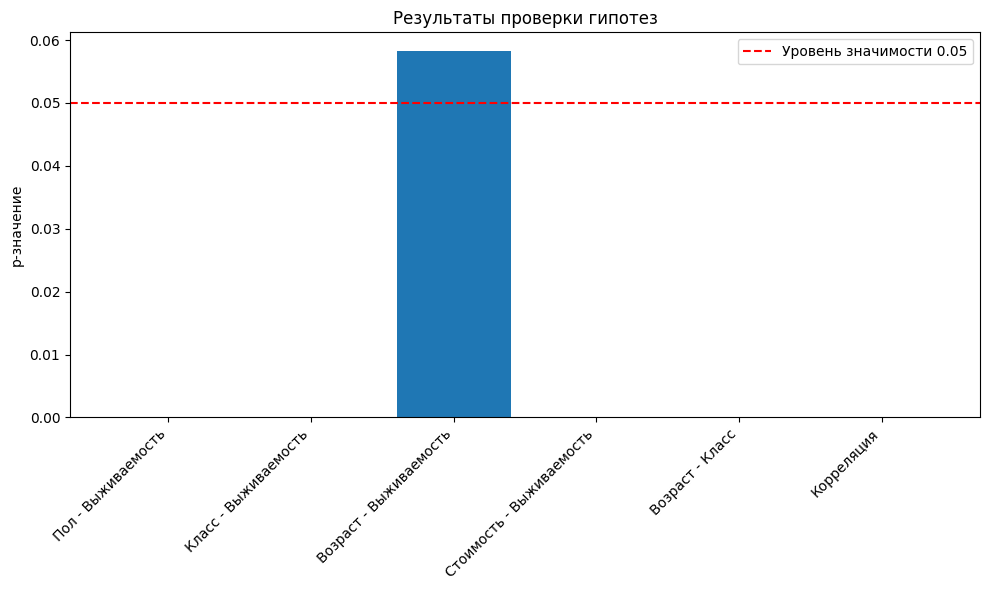

In [ ]:
# Визуализация результатов проверки гипотез
plt.figure(figsize=(10, 6))
hypotheses = ['Пол - Выживаемость', 'Класс - Выживаемость', 'Возраст - Выживаемость',
              'Стоимость - Выживаемость', 'Возраст - Класс', 'Корреляция']
p_values = [p_sex, p_class, p_value_age, p_value_fare, p_value_age_class, p_value_corr]

plt.bar(hypotheses, p_values)
plt.axhline(y=0.05, color='r', linestyle='--', label='Уровень значимости 0.05')
plt.xticks(rotation=45, ha='right')
plt.ylabel('p-значение')
plt.title('Результаты проверки гипотез')
plt.legend()
plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

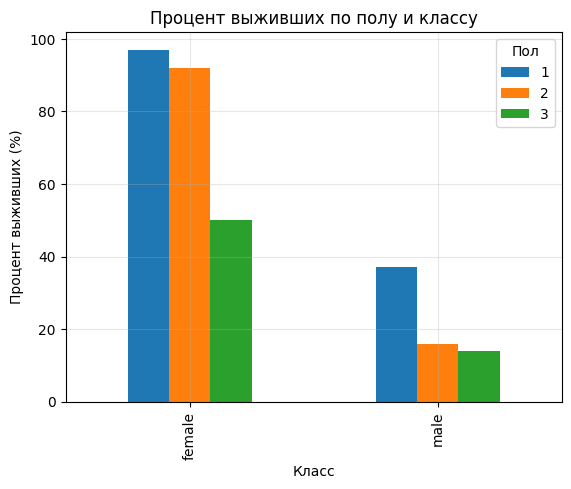

In [ ]:
# Создание сводной таблицы по выживаемости по полу и классу
pivot_table = pd.crosstab(
    [df['Sex'], df['Pclass']],
    df['Survived'],
    normalize='index'
).round(2)*100

# Визуализация процента выживших по полу и классу
plt.figure(figsize=(12, 6))
pivot_table[1].unstack().plot(kind='bar', stacked=False)
plt.title('Процент выживших по полу и классу')
plt.ylabel('Процент выживших (%)')
plt.xlabel('Класс')
plt.legend(title='Пол')
plt.grid(True, alpha=0.3)
plt.show()

# Интерпретация результатов статистических гипотез

## Гипотеза 1: Зависимость между полом и выживаемостью
- **p-значение = 1.1973e-58** (крайне малое)
- **Вывод**: Гипотеза подтверждена с высокой статистической значимостью
- **Интерпретация**: Пол был критическим фактором выживаемости на Титанике. Женщины имели значительно более высокие шансы на спасение. График показывает, что женщины первого класса имели почти 100% выживаемость, в то время как у мужчин третьего класса этот показатель был около 14%.

## Гипотеза 2: Зависимость между классом и выживаемостью
- **p-значение = 4.5493e-23** (крайне малое)
- **Вывод**: Гипотеза подтверждена с высокой статистической значимостью
- **Интерпретация**: Класс пассажира оказывал прямое влияние на шансы выживания. Данные показывают четкую градацию: пассажиры первого класса имели наибольшие шансы выжить, третьего - наименьшие.

## Гипотеза 3: Различие среднего возраста выживших и погибших
- **p-значение = 0.0583** (больше порогового значения 0.05)
- **Вывод**: Гипотеза не подтверждена, нулевая гипотеза не отвергается
- **Интерпретация**: Нет статистически значимых доказательств того, что средний возраст выживших отличался от среднего возраста погибших. На графике это единственная гипотеза с p-значением выше критического уровня 0.05.

## Гипотеза 4: Различие в стоимости билета между выжившими и погибшими
- **p-значение = 4.5535e-22** (крайне малое)
- **Вывод**: Гипотеза подтверждена с высокой статистической значимостью
- **Интерпретация**: Пассажиры с более дорогими билетами имели значительно более высокие шансы на спасение. Это согласуется с результатами по второй гипотезе, так как стоимость билета коррелирует с классом.

## Гипотеза 5: Различие среднего возраста в разных классах
- **p-значение = 6.3224e-25** (крайне малое)
- **Вывод**: Гипотеза подтверждена с высокой статистической значимостью
- **Интерпретация**: Возрастной состав пассажиров существенно различался между классами. Это может объяснять структуру размещения и, как следствие, разные шансы на спасение.

## Гипотеза 6: Корреляция между стоимостью билета и выживаемостью
- **p-значение = 6.1202e-15** (крайне малое)
- **Статистика (корреляция Пирсона) = 0.2573**
- **Вывод**: Гипотеза подтверждена
- **Интерпретация**: Существует положительная корреляция между стоимостью билета и выживаемостью, хотя сила связи умеренная (0.2573). Чем дороже билет, тем выше вероятность выживания.

## Дополнительный тест: Различие распределения возраста по классам
- **p-значение = 6.3534e-21** (крайне малое)
- **Вывод**: Гипотеза подтверждена
- **Интерпретация**: Непараметрический тест Краскела-Уоллиса показывает, что распределение возраста пассажиров статистически различается между классами. Это подтверждает результаты ANOVA (гипотеза 5).

## Общие выводы:
1. Наиболее значимые факторы выживания: пол и класс пассажира
2. Женщины из первого и второго класса имели наивысшие шансы на спасение
3. Стоимость билета положительно коррелирует с выживаемостью
4. Возраст сам по себе не был определяющим фактором выживания
5. В разных классах наблюдался разный возрастной состав пассажиров

Результаты соответствуют историческим данным о политике "женщины и дети сначала" при эвакуации и неравном доступе к спасательным шлюпкам между классами пассажиров.